In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import neighbors,tree
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [182]:
df = pd.read_csv('data/data.csv')

In [183]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [184]:
df.shape

(569, 32)

In [185]:
df.isnull().sum() # Double check null value

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [186]:
# Total 31 columns are numeric
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [187]:
df.columns.to_list()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [188]:
y = df['diagnosis']
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [189]:
M_count = (df['diagnosis']=='M').sum()
B_count = (df['diagnosis']=='B').sum()
M_perc = M_count/df['diagnosis'].shape[0]
B_perc = 1 - M_perc

In [190]:
print('{:.1%}'.format(1/3.0))

33.3%


Text(0.5, 0, 'Histogram of Diagnosis')

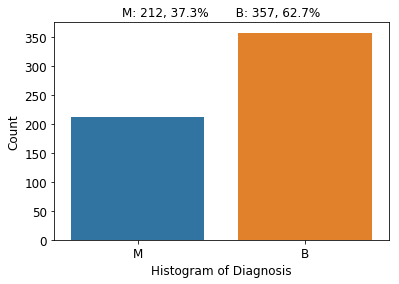

In [191]:
ax = sns.countplot(y)
ax.set_title('M: {}, {:.1%}       B: {}, {:.1%}'.format(M_count,M_perc,B_count,B_perc))
ax.tick_params(labelsize=12)
ax.set_ylabel("Count",fontsize = 12)
ax.set_xlabel("Histogram of Diagnosis",fontsize = 12)

In [192]:
array = df.columns.values[2:][:]
array

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [193]:
subdf = df.loc[:,array]
subdf.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [194]:
subdf.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [195]:
melted = pd.melt(subdf)

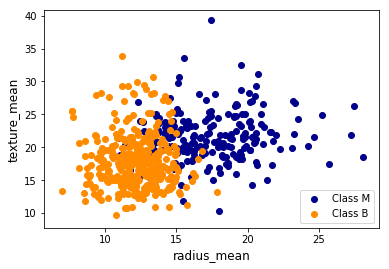

In [196]:
X = df.loc[:,'radius_mean':'perimeter_mean']
plt.scatter(X[y=='M']['radius_mean'], X[y=='M']['texture_mean'], label='Class M', c='darkblue')
plt.scatter(X[y=='B']['radius_mean'], X[y=='B']['texture_mean'], label='Class B', c='darkorange')
# Prettify the graph
plt.legend()
plt.xlabel('radius_mean',fontsize = 12)
plt.ylabel('texture_mean',fontsize = 12)
plt.legend(loc=4)
#plt.axis('equal')
# display
plt.show()

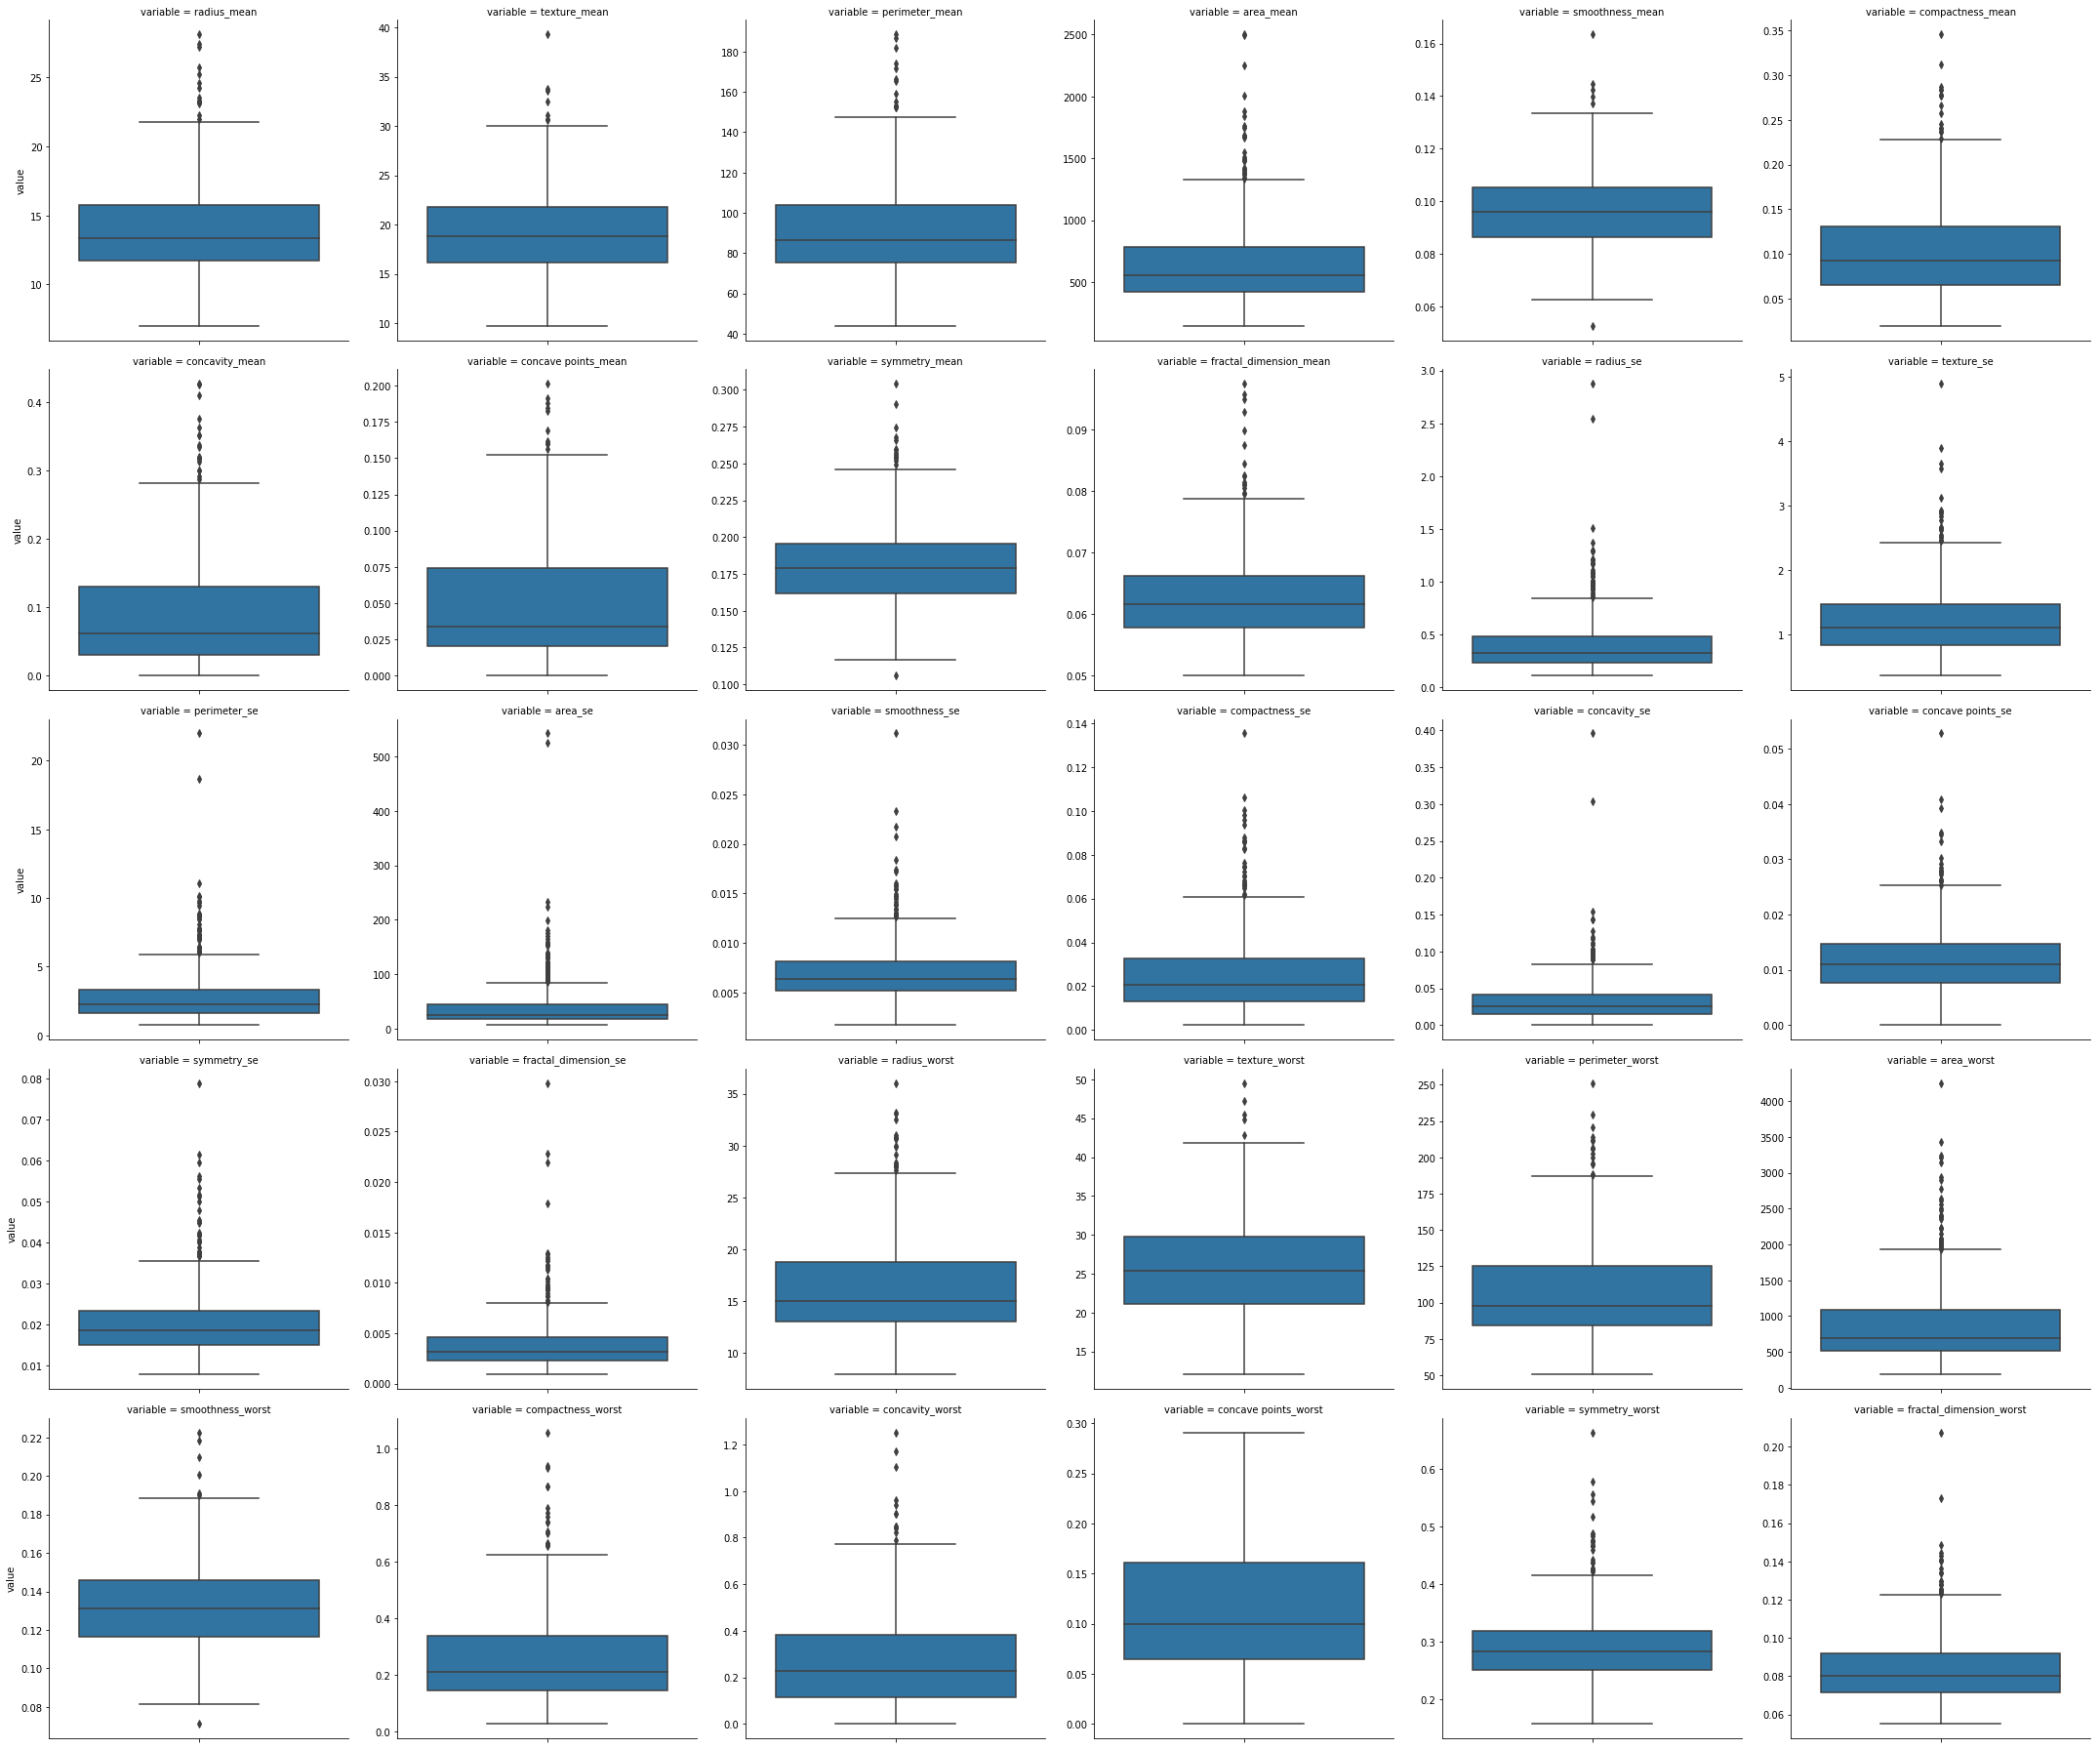

In [197]:
fig =sns.catplot(y='value',col='variable',data=melted, col_wrap=6,kind="box",sharey=False)

In [198]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1}) # Turn categorical value to numeric 1 and 0
df=df.drop(['id'], axis=1) # drop id which is not reasonably related to the target analysis
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [199]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] 

In [200]:
df['diagnosis'].value_counts() # previously 357,212

0    332
1    163
Name: diagnosis, dtype: int64

In [201]:
df = df.reset_index(drop=True) # reset index
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [202]:
X = df.loc[:,'radius_mean':]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [203]:
X_mean = df.loc[:,'radius_mean':'fractal_dimension_mean']
X_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742


In [204]:
X_se = df.loc[:,'radius_se':'fractal_dimension_se']
X_se.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
1,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
2,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
3,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082
4,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179


In [205]:
X_worst = df.loc[:,'radius_worst':'fractal_dimension_worst']
X_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [206]:
rs = 0 # Preset randomstate
y = df['diagnosis']

In [207]:
# Visualization of PCA and T-sne
def pca_tsne_plot(X,y,string):
    pca = PCA(n_components=2)
    pca_2d = pca.fit_transform(np.array(X))
    pca_df = pd.DataFrame({'Dimension_1':pca_2d[:,0],'Dimension_2':pca_2d[:,1],'Target':y[:]})

    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
    tsne_results = tsne.fit_transform(X)
    tsne_df = pd.DataFrame({'Dimension_1':tsne_results[:,0],'Dimension_2':tsne_results[:,1],'Target':y[:]})
    fig = plt.figure(figsize = (15,5))
    plt.subplot(121)
    plt.scatter(pca_df[pca_df['Target']==1]['Dimension_1'],pca_df[pca_df['Target']==1]['Dimension_2'], marker='o',\
                color='magenta',edgecolor = "black", alpha=0.6,s=20, label='M')
    plt.scatter(pca_df[pca_df['Target']==0]['Dimension_1'],pca_df[pca_df['Target']==0]['Dimension_2'], marker='o',
                color='cyan',edgecolor = "black", alpha=0.6,s=20, label='B')
    plt.legend(loc =4)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('PCA Scatter Plot: {}'.format(string))
 
    plt.subplot(122)
    plt.scatter(tsne_df[tsne_df['Target']==1]['Dimension_1'],tsne_df[tsne_df['Target']==1]['Dimension_2'], marker='o',\
                color='magenta',edgecolor = "black", alpha=0.3,s=20, label='M')
    plt.scatter(tsne_df[tsne_df['Target']==0]['Dimension_1'],tsne_df[pca_df['Target']==0]['Dimension_2'], marker='o',
                color='cyan',edgecolor = "black", alpha=0.3,s=20, label='B')
    plt.title('TSNE Scatter Plot: {}'.format(string))
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(loc =4)
    #path = 'Plot: '+ string +'.png'
    #fig.savefig(path,bbox_inches='tight', dpi=100)
    plt.show()



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.038s...
[t-SNE] Computed neighbors for 495 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 14.131249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.946976
[t-SNE] KL divergence after 2000 iterations: 0.139578


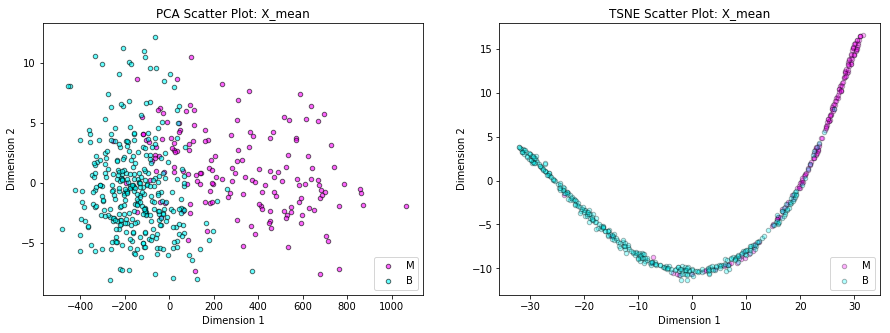

In [208]:
pca_tsne_plot(X_mean,y,'X_mean')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 1.155328
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.203796
[t-SNE] KL divergence after 2000 iterations: 0.161476


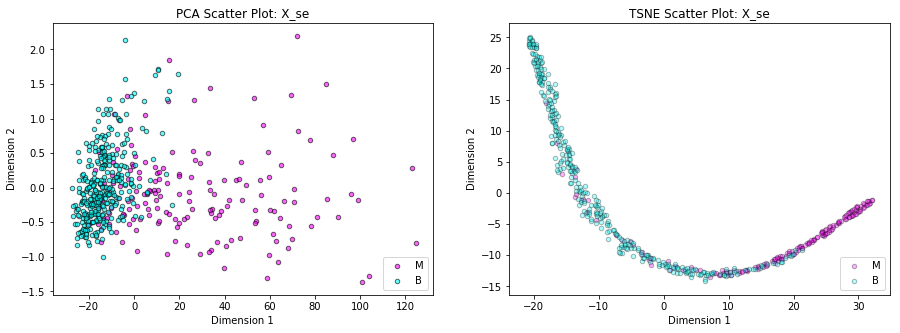

In [209]:
pca_tsne_plot(X_se,y,'X_se')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 16.416708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.073479
[t-SNE] KL divergence after 2000 iterations: 0.137726


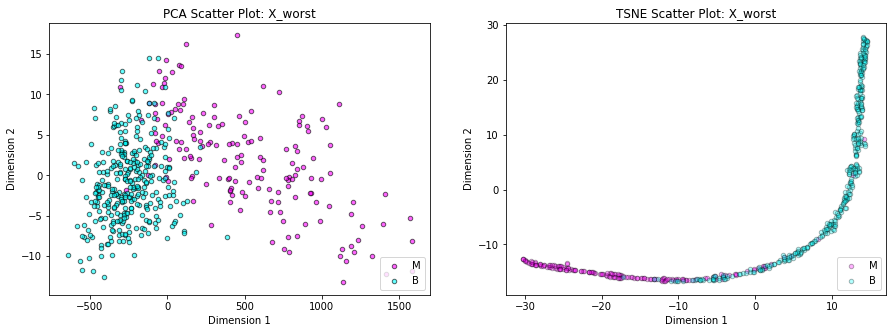

In [210]:
pca_tsne_plot(X_worst,y,'X_worst')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 33.052068
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.972141
[t-SNE] KL divergence after 2000 iterations: 0.205533


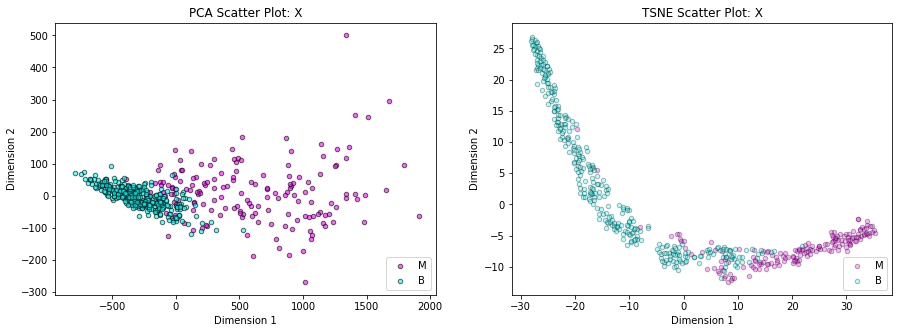

In [211]:
pca_tsne_plot(X,y,'X')

In [212]:
# Standarlized Visualization of PCA and T-sne
def pca_tsne_plot_std(X,y,string):
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_2d = pca.fit_transform(np.array(X_std))
    pca_df = pd.DataFrame({'Dimension_1':pca_2d[:,0],'Dimension_2':pca_2d[:,1],'Target':y[:]})

    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
    tsne_results = tsne.fit_transform(X_std)
    tsne_df = pd.DataFrame({'Dimension_1':tsne_results[:,0],'Dimension_2':tsne_results[:,1],'Target':y[:]})
    plt.figure(figsize = (15,5))
    plt.subplot(121)
    plt.scatter(pca_df[pca_df['Target']==1]['Dimension_1'],pca_df[pca_df['Target']==1]['Dimension_2'], marker='o',\
                color='red',edgecolor = "black", alpha=0.6,s=20, label='M')
    plt.scatter(pca_df[pca_df['Target']==0]['Dimension_1'],pca_df[pca_df['Target']==0]['Dimension_2'], marker='o',
                color='springgreen',edgecolor = "black", alpha=0.6,s=20, label='B')
    plt.legend(loc =4)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('PCA Scatter Plot: {}'.format(string))
    plt.subplot(122)
    plt.scatter(tsne_df[tsne_df['Target']==1]['Dimension_1'],tsne_df[tsne_df['Target']==1]['Dimension_2'], marker='o',\
                color='red',edgecolor = "black", alpha=0.6,s=20, label='M')
    plt.scatter(tsne_df[tsne_df['Target']==0]['Dimension_1'],tsne_df[pca_df['Target']==0]['Dimension_2'], marker='o',
                color='springgreen',edgecolor = "black", alpha=0.6,s=20, label='B')
    plt.title('TSNE Scatter Plot: {}'.format(string))
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(loc =4)
    plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 0.974430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.376656
[t-SNE] KL divergence after 1400 iterations: 0.742571


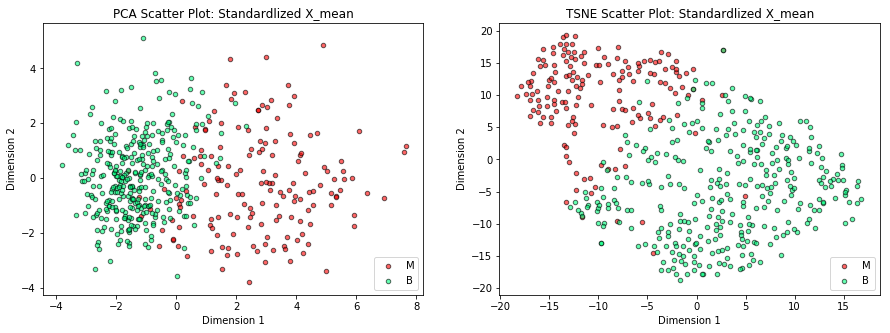

In [213]:
pca_tsne_plot_std(X_mean,y,'Standardlized X_mean')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 0.910318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.671070
[t-SNE] KL divergence after 1450 iterations: 0.808203


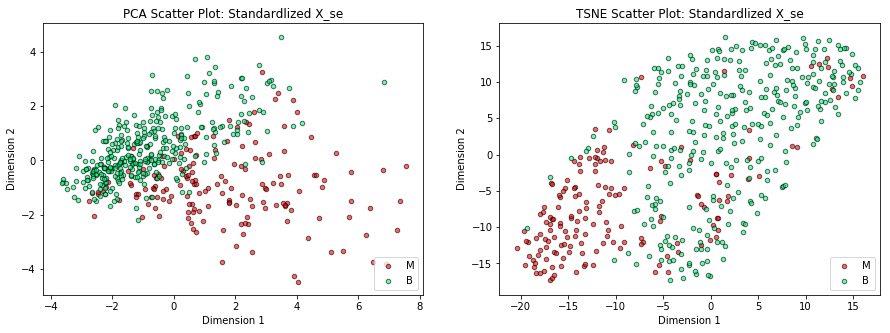

In [214]:
pca_tsne_plot_std(X_se,y,'Standardlized X_se')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.001s...
[t-SNE] Computed neighbors for 495 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 0.966587
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.103951
[t-SNE] KL divergence after 1400 iterations: 0.795061


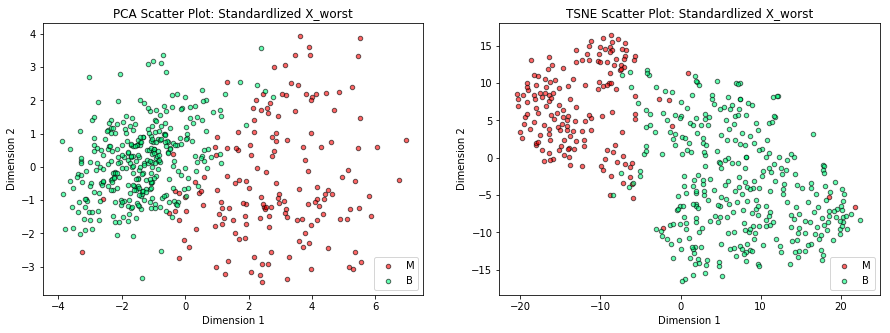

In [215]:
pca_tsne_plot_std(X_worst,y,'Standardlized X_worst')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.002s...
[t-SNE] Computed neighbors for 495 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 1.770396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.169540
[t-SNE] KL divergence after 1500 iterations: 0.868707


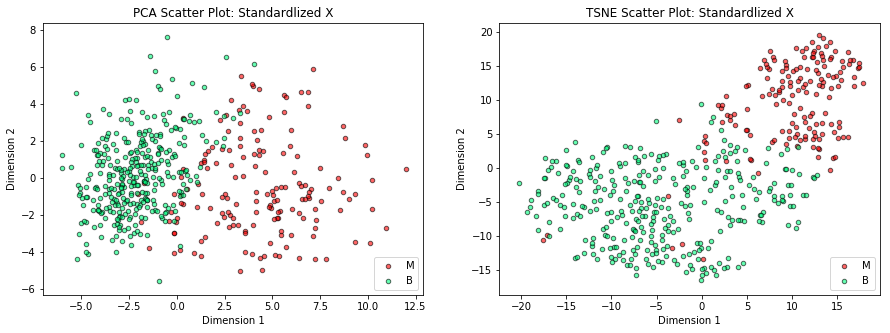

In [216]:
pca_tsne_plot_std(X,y,'Standardlized X')

In [217]:
X_std = X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

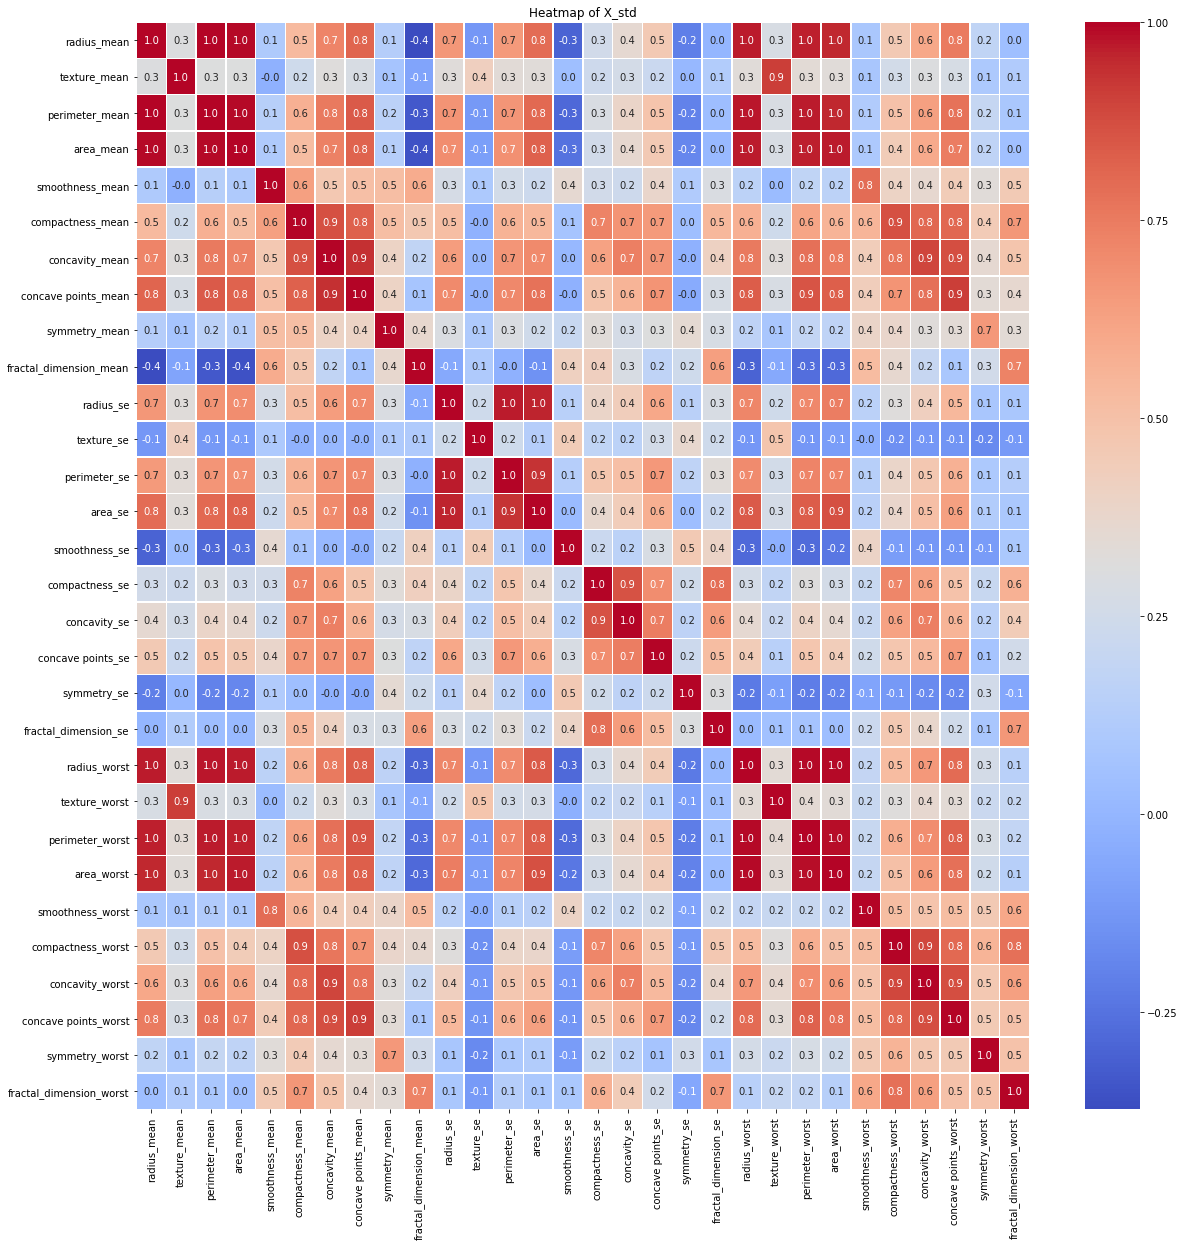

In [218]:
f,ax = plt.subplots(figsize=(20, 20))
ax.set_title('Heatmap of X_std')
sns.heatmap(X_std.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap='coolwarm')

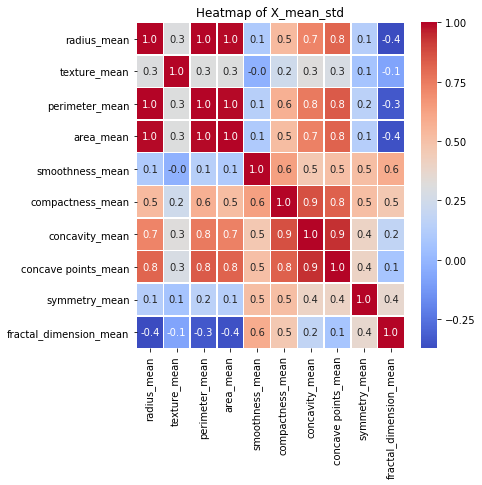

In [219]:
X_mean_std =X_mean.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
f,ax = plt.subplots(figsize=(6, 6))
ax.set_title('Heatmap of X_mean_std')
sns.heatmap(X_mean_std.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm')

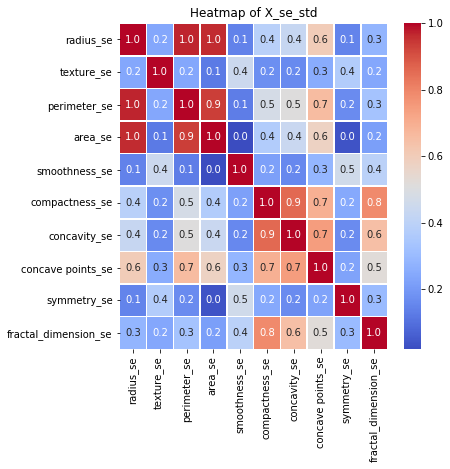

In [220]:
X_se_std =X_se.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
f,ax = plt.subplots(figsize=(6, 6))
ax.set_title('Heatmap of X_se_std')
sns.heatmap(X_se_std.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm')

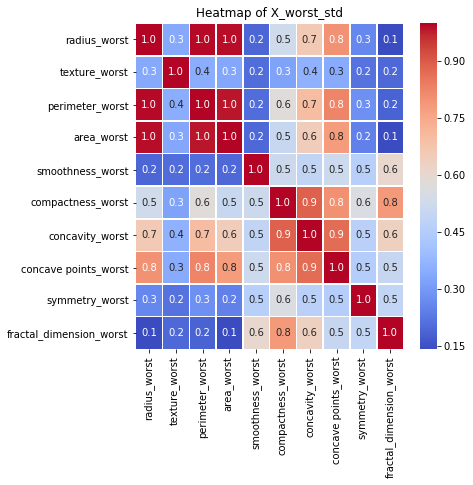

In [221]:
X_worst_std =X_worst.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
f,ax = plt.subplots(figsize=(6, 6))
ax.set_title('Heatmap of X_worst_std')
sns.heatmap(X_worst_std.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm')

## KNN

In [222]:
# First, we split the dataset into a training and a validation dataset.
# To initially make the problem a bit more uncertain, we are going to limit
# ourselves to a subset of features.  This is NOT something that you want to
# do in practice, but is helpful for illustrating how probabilities change.
sorted_in_quality=np.argsort(feature_selection.f_regression(X.values,y))[0]
X_train,X_test,y_train,y_test=\
    model_selection.train_test_split(X.values[:,sorted_in_quality[:15]],y,random_state=42)

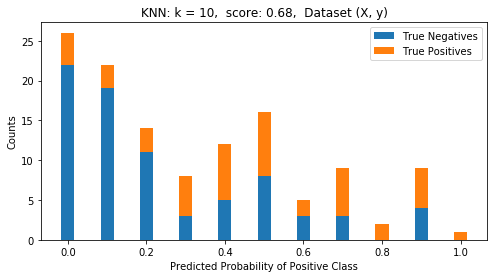

In [223]:
# Next, we want to apply a kNN classifier to the data.  Here,
# we define the classifier and apply it to the training data.
knn=neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
# We then predict the probabilities on the validation dataset.
# The probability command returns probability of 0 and the
# probability of 1, so we only need to keep the 1.  For a
# binary classification problem, this is redundant, but is
# very helpful for multiple classes.
p01=knn.predict_proba(X_test[y_test==0])[:,1]
p11=knn.predict_proba(X_test[y_test==1])[:,1]
pred = knn.predict(X_test)
fig=plt.figure(figsize=[8,4])
n_bins=31
plt.hist([p01,p11],bins=n_bins,stacked=True,range=[0-.5/(n_bins-1),1+.5/(n_bins-1)])
plt.legend(['True Negatives','True Positives '])
plt.title('KNN: k = %d,  score: %.2f,  Dataset (X, y)'% (10,knn.score(X_test,y_test)))
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Counts')
plt.show()

## Logistic Regression

D:\Program Files\ANACONA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


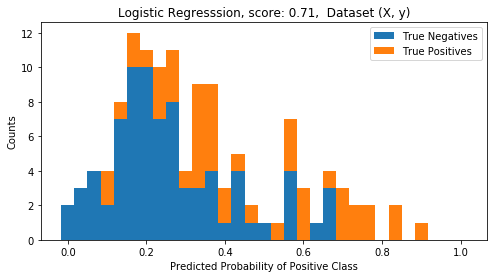

In [224]:
# Same thing, but with logistic regression
lr=linear_model.LogisticRegression()#solver='sag'
lr.fit(X_train,y_train)
p01=lr.predict_proba(X_test[y_test==0])[:,1]
p11=lr.predict_proba(X_test[y_test==1])[:,1]
fig=plt.figure(figsize=[8,4])
n_bins=31
plt.hist([p01,p11],bins=n_bins,stacked=True,range=[0-.5/(n_bins-1),1+.5/(n_bins-1)])
plt.legend(['True Negatives','True Positives '])
plt.title('Logistic Regresssion, score: %.2f,  Dataset (X, y)'% (lr.score(X_test,y_test)))
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Counts')
plt.show()

D:\Program Files\ANACONA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


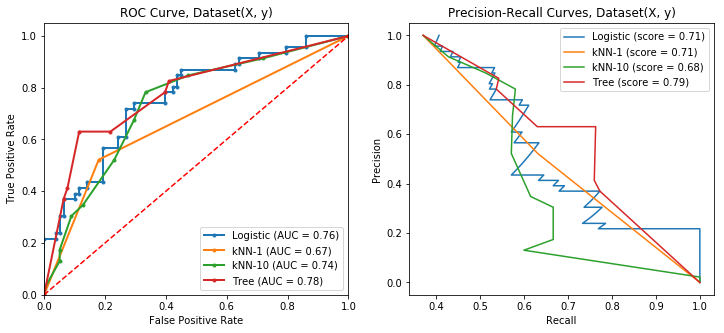

In [225]:
models_to_compare=[linear_model.LogisticRegression(),\
                  neighbors.KNeighborsClassifier(n_neighbors=1),\
                  neighbors.KNeighborsClassifier(n_neighbors=10),\
                  tree.DecisionTreeClassifier(max_depth=3)]
model_names=['Logistic','kNN-1','kNN-10','Tree']
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
lw = 2
# define a loop over all models, and plot their ROC curves on the same figure
for cls,name in zip(models_to_compare,model_names):
    cls.fit(X_train,y_train)
    y_pred=cls.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    prec1, rec1, thresholds1 = metrics.precision_recall_curve(y_test,y_pred)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, '.-',
         lw=lw, label=name+' (AUC = %0.2f)' % roc_auc)
    ax2.plot(prec1, rec1, label= name+' (score = %0.2f)' % cls.score(X_test,y_test))
ax1.plot([0, 1], [0, 1], 'r--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve, Dataset(X, y)')
ax1.legend(loc="lower right")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.set_title("Precision-Recall Curves, Dataset(X, y)")
ax2.legend()
plt.show()    

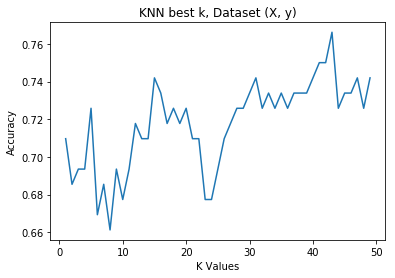

In [226]:
score_list = []
for each in range(1,50):
    knn_2 = KNeighborsClassifier(n_neighbors = each)
    knn_2.fit(X_train, y_train)
    score_list.append(knn_2.score(X_test,y_test))
plt.title("KNN best k, Dataset (X, y)")
plt.plot(range(1,50), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [227]:
def minPe(X,y):
    # testing on testing data
    fig1=plt.figure(figsize=(15,6))
    fig1, ax1 = plt.subplots()
    ax1 = plt.subplot()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state = 0,stratify=y)
    minPe = []
    x = []
    minPeT = [] # testing on training data
    xT = []
    num = len(y)
    for i in range(1,200):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
        mydict = dict()
        for j in range(0,len(fpr)):
            Pcd = 0.5 * (1 - fpr[j]) + 0.5 * tpr[j]
            mydict[Pcd] = j
        minPe.append(1 - max(mydict))
        x.append(num/i)
        yT_pred = knn.predict_proba(X_train)
        fprT, tprT, thresholdT = roc_curve(y_train, yT_pred[:, 1])
        mydictT = dict()
        for k in range(0,len(fprT)):
            Pcd = 0.5 * (1 - fprT[k]) + 0.5 * tprT[k]
            mydictT[Pcd] = k
        minPeT.append(1 - max(mydictT))
    y1 = min(minPe)
    index_min = np.argmin(minPe)
    x1 = x[index_min]
    N1 = num/x1
    y2 = min(minPeT)
    index_minT = np.argmin(minPeT)
    x2 = x[index_minT]
    N2 = num/x2   
    ax1.plot(x, minPe, c='darkorange', lw = 2,label = 'tested on testing data')
    ax1.plot(x, minPeT, c='green', lw = 2,label = 'tested on training data')
    ax1.scatter(x1, y1,c='b',label='tested on testing data: minPe %.2F, k = %d' % (y1,N1),edgecolor='k', s=50)
    ax1.scatter(x2, y2,c='R',label='tested on training data: minPe %.2F, k = %d' % (y2,N2),edgecolor='k', s=50)
    ax1.set_title('minPe as function of N/k, Dataset(X, y)')
   # plt.plot([0, 1], [0, 1],'r--')
    ax1.set_ylabel('minPe')
    ax1.set_xlabel('N/k')
    box = ax1.get_position()
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig1.show()

D:\Program Files\ANACONA\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 1080x432 with 0 Axes>

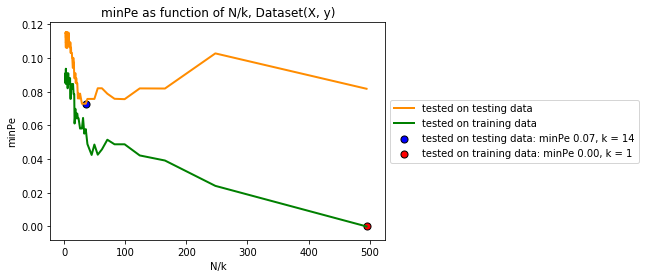

In [228]:
minPe(X,y)